In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [17]:
#load betas se and pvalues for exp2 (at gate 4) , exp_ctrl (at gate 1)
#acoustic_rate  ,phonemic_rate ,syllabic_rate,
#phonemic_information_rate,syllabic_information_rate,
#static_lexical_surprise and contextual_lexical_surprise
previous, current = os.path.split(os.getcwd())
dname = previous[0:-5]
betas = np.load(dname +"\\data\\exp_2&ctrl_betas.npy")

In [18]:
n_variables = 7
variable_names = [
    r'Acoustic modulation rate ($s^{-1}$)',
    r'Phonemic rate ($s^{-1}$)',
    r'Syllabic rate ($s^{-1}$)',
    r'Phonemic information ($bit.s^{-1}$)',
    r'Syllabic information ($bit.s^{-1}$)', 
    r'Static lexical surprise ($bit.s^{-1}$)',
    r'Contextual lexical surprise ($bit.s^{-1}$)'
]

colors = ['grey','#e41a1c', '#ff7f00','#efca08',  '#4daf4a', '#377eb8', 'darkorchid']
titles = [r'$\it{Experiment\ 2}$' + "\n" + r'$\bf{gate\ 4}$', 
          r'$\it{Experiment\ 3}$' + "\n" + r'$\bf{gate\ 1}$']

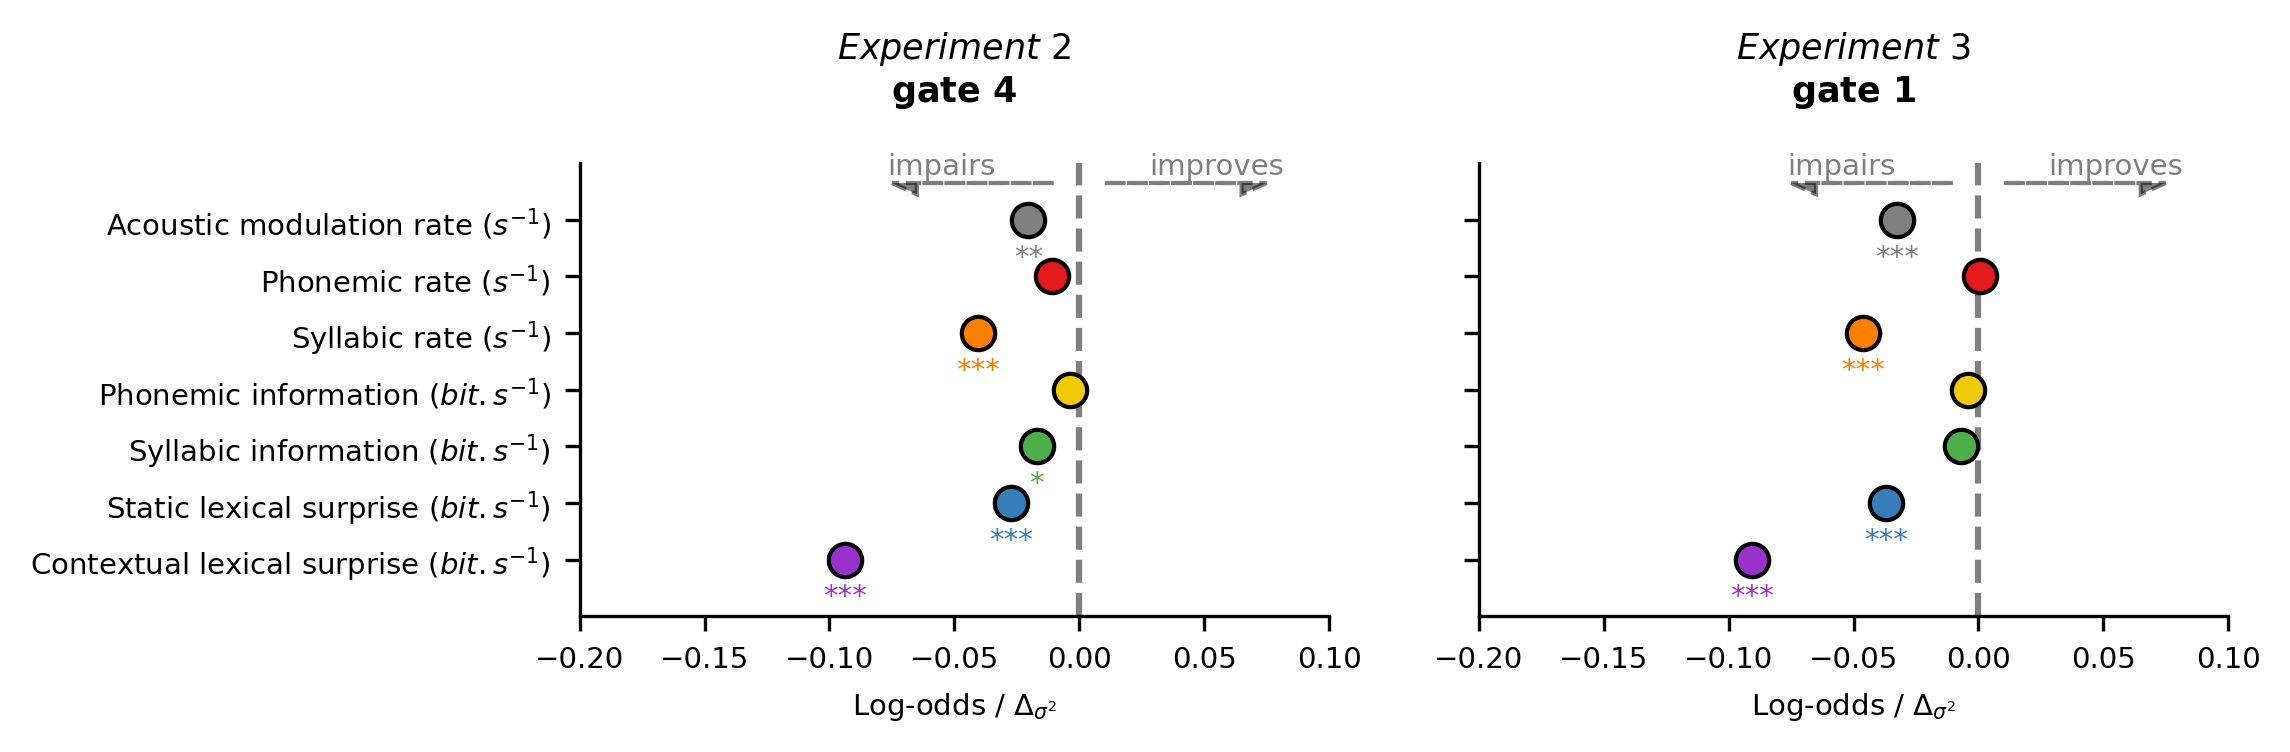

In [19]:

fig1, axs = plt.subplots(1, 2, figsize=(7.09, 2), facecolor='w', dpi=300)
plt.rcParams["font.size"] = "7"

all_coef = []
all_se = []
for i, (ax, title) in enumerate(zip(axs, titles,)):
    
    # Get model coefficients
    coefs = [betas[j][i][0] for j in range(7)]
    se = [betas[j][i][1] for j in range(7)]
    pvals = [betas[j][i][2] for j in range(7)]
     
    
    # Plot
    for j, color in zip(np.arange(0, n_variables), colors): # Remove intercept 
        
        # Plot points + se
        markerfacecolor = color
        ax.errorbar(coefs[j], y=j, xerr=se[j], marker='o', 
                    elinewidth=3, linewidth=0.5, color=color, 
                    markerfacecolor=markerfacecolor, markeredgecolor='k', ms=8)
        all_coef.append(coefs[j])
        all_se.append(se[j])
        # Plot * of p-values
        txt = '' if pvals[j] > 0.05 else ('*' if pvals[j] > 0.01 else ('**' if pvals[j] > 0.001 else '***'))
        ax.annotate(txt, (coefs[j], j+0.65), va='center', ha='center', color=color)

    # Aesthetics
    ax.axvline(0, color='k', linestyle='--', alpha=0.5)
    ax.set_ylim(n_variables, -1)
    ax.set_xlim(-.2, 0.1)
    ax.set_xlabel('Log-odds / $\Delta_{\sigma^2}$')
    ax.set_title(title, fontweight='bold', pad=15)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_yticks(np.arange(0, n_variables))
    if i == 0:
        ax.set_yticklabels(variable_names)
    else:
        ax.set_yticklabels([])

    # Arrows
    l = 0.055
    x = 0
    y = -0.65
    hw = 0.4
    hl = 0.01
    offset = 0.01
    ax.arrow(x + offset, y, l, 0, head_width=hw, shape='right', head_length=hl, 
             color='k', linestyle='--', alpha=0.5)
    ax.arrow(x - offset, y, -l, 0, head_width=hw, shape='left', head_length=hl, 
             color='k', linestyle='--', alpha=0.5)
    ax.annotate('improves', (x + l, y - 0.3), va='center', ha='center', alpha=0.5)
    ax.annotate('impairs', (x - l, y - 0.3), va='center', ha='center', alpha=0.5)

In [22]:
#fig1.savefig(dname + "\\Figures\\Figure_supp6_partA.png", dpi=300,facecolor='white', bbox_inches='tight')

In [20]:
#load betas for each feature at different speed

odds = pd.read_csv(dname + '\\data\\odds_ratio_sentences.csv')
odds = odds.drop(['Unnamed: 0', 'intercept'], axis = 1)

In [21]:
colors = ['grey','#e41a1c', '#ff7f00','#efca08',  '#4daf4a', '#377eb8', 'darkorchid']
var_names = [ r'Acoustic modulation rate ($s^{-1}$)',
    r'Phonemic rate ($s^{-1}$)',
    r'Syllabic rate ($s^{-1}$)',
    r'Phonemic information ($bit.s^{-1}$)',
    r'Syllabic information ($bit.s^{-1}$)', 
    r'Static lexical surprise ($bit.s^{-1}$)',
    r'Contextual lexical surprise ($bit.s^{-1}$)'
]

In [22]:
df_sentences = pd.read_csv(dname+"\\data\\all_subjects_sentences.csv")

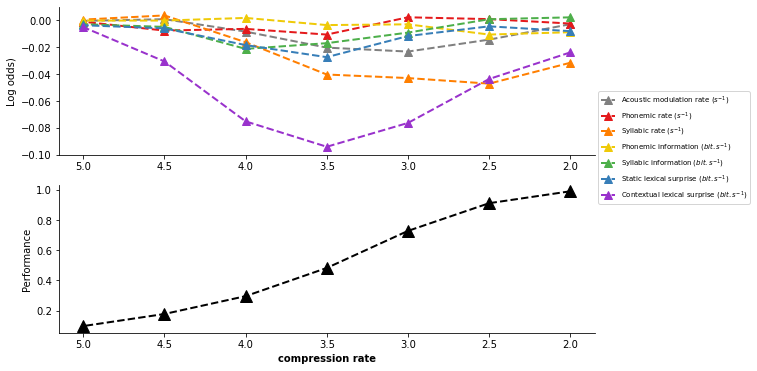

In [32]:
fig,(ax,ax1) = plt.subplots(2,1, figsize=(12,6))

for i in range(7):
    ax.plot(odds[odds.columns[0]].values,odds[odds.columns[i+1]],marker="^",markersize = 8,linewidth= 2,ls='--', c = colors[i], label=var_names[i]);
    ax.set_xticks(odds[odds.columns[0]].values );
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xticklabels(odds[odds.columns[0]].values[::-1] );
box = ax.get_position()
ax.set_ylim(-0.1,0.01)
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_ylabel("Log odds)",fontsize=10);
ax.tick_params(axis='both', which='major', labelsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.05));
ax1.plot(odds[odds.columns[0]].values,df_sentences.groupby(['vitesse'])['scores'].mean().values,marker="^",markersize = 12,linewidth= 2,ls='--', c = "k")
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xticks(odds[odds.columns[0]].values );
ax1.set_xticklabels(odds[odds.columns[0]].values[::-1] );
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.set_xlabel("compression rate",weight='bold',fontsize=10);
ax1.set_ylabel("Performance",fontsize=10);
ax1.tick_params(axis='both', which='major', labelsize=10);

In [26]:
#fig.savefig(\\Figures\\Figure_supp6_partB.png", dpi=300,facecolor='white', bbox_inches='tight')